## INTRODUCTION: DATA ANALYSIS AND INSIGHTS : TASK 2
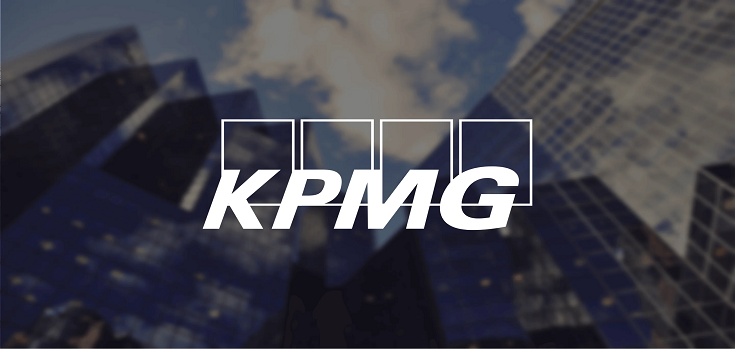<br>

Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes.<br>

For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour.<br>

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation.<br>

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration; Model Development and Interpretation.<br>

Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take.<br>

Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.

In [58]:
import pandas as pd
from datetime import datetime, date
from dateutil.relativedelta import relativedelta

import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors
%matplotlib inline

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

#### Reading in the various datasets

In [59]:
df1 = pd.read_csv('./datasets/customer demographic.csv')
df2 = pd.read_csv('./datasets/customer address.csv')
df3 = pd.read_csv('./datasets/transactions.csv')

#### Merging the two dataframes together using a common column in both dataframes

In [60]:
#Merging the three dataframes base on a column
df4 = pd.merge(df1,df2,on='customer_id')
df5 = pd.merge(df4,df3,on='customer_id')

In [61]:
df5.sample(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,date_of_birth,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
13298,2391,Corny,Millott,Female,72,1961-04-22,Nurse Practicioner,Health,Mass Customer,No,...,2017-06-02,0.0,Cancelled,Giant Bicycles,Touring,medium,large,1873.97,863.95,1970-01-01 10:47:39
19290,3477,Jaquelin,Leek,Female,90,1996-01-24,Senior Developer,Financial Services,Affluent Customer,No,...,2017-05-10,1.0,Approved,OHM Cycles,Road,medium,small,1810.00,1610.90,1970-01-01 10:08:18
3428,610,Hyatt,Craine,Male,45,1958-03-16,Help Desk Technician,Financial Services,Mass Customer,No,...,2017-04-10,1.0,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,1970-01-01 09:55:07
9995,1795,Wally,Rebbeck,Male,40,1977-09-21,Internal Auditor,Manufacturing,Affluent Customer,No,...,2017-09-07,0.0,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,1970-01-01 11:24:24
5832,1037,Sissie,Rielly,Female,95,1956-08-08,Human Resources Assistant II,Financial Services,Mass Customer,No,...,2017-07-25,0.0,Approved,Norco Bicycles,Standard,medium,small,586.45,521.94,1970-01-01 09:17:09


In [62]:
#Getting the number of rows and columns in the dataframe
df5.shape

(19408, 29)

#### Exploratory analysis

In [63]:
#Getting the numbers of rows with duplicates
df5.duplicated().sum()

0

In [64]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19408 entries, 0 to 19407
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19408 non-null  int64  
 1   first_name                           19408 non-null  object 
 2   last_name                            19408 non-null  object 
 3   gender                               19408 non-null  object 
 4   past_3_years_bike_related_purchases  19408 non-null  int64  
 5   date_of_birth                        18978 non-null  object 
 6   job_title                            19408 non-null  object 
 7   job_industry_category                19408 non-null  object 
 8   wealth_segment                       19408 non-null  object 
 9   deceased_indicator                   19408 non-null  object 
 10  owns_car                             19408 non-null  object 
 11  tenure                      

In [65]:
#Getting the columns and a sum of their null values
df5.isna().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
date_of_birth                          430
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
street_address                           0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_lin

In [66]:
#Getting all rows with complete null values.
df5[df5.isna().all(axis=1)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,date_of_birth,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


In [67]:
df5["date_of_birth"] = df5["date_of_birth"].fillna(0)

#### AUGMENTING DATAFRAME WITH ADDITIONAL COLUMNS REQUIRED FOR ANALYSIS

##### AGE COLUMN

In [68]:
#Adding Age Column
df5["date_of_birth"] = pd.to_datetime(df5["date_of_birth"])
df5["age"] = df5.apply(lambda x: relativedelta(datetime.now().date(), x['date_of_birth']).years if x.notnull().all() else pd.NaT, axis=1)

In [69]:
df5[["date_of_birth","age"]]

,date_of_birth,age
0,1953-10-12,69
1,1953-10-12,69
2,1953-10-12,69
3,1953-10-12,69
4,1953-10-12,69
...,...,...
19403,1967-07-21,56
19404,1967-07-21,56
19405,1967-07-21,56
19406,1967-07-21,56


#### PROFIT COLUMN

In [70]:
df5['profit'] = df5['list_price'] - df5['standard_cost']

In [71]:
df5[['list_price','standard_cost','profit']]

,list_price,standard_cost,profit
0,235.63,125.07,110.56
1,1577.53,826.51,751.02
2,1720.70,1531.42,189.28
3,360.40,270.30,90.10
4,71.49,53.62,17.87
...,...,...,...
19403,792.90,594.68,198.22
19404,1228.07,400.91,827.16
19405,1311.44,1167.18,144.26
19406,60.34,45.26,15.08


#### AGE GROUP COLUMN

In [72]:
bins = [20, 30, 40, 50, 60, 70, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']

df5['age_group'] = pd.cut(df5['age'], bins=bins, labels=labels)

### ANALYSIS AND INSIGHTS

### 1: AGE GROUP WITH THE MOST BIKE PURCHASES

In [73]:
insight_1 = df5.groupby('age_group')['past_3_years_bike_related_purchases'].count().reset_index()

In [74]:
insight_1

,age_group,past_3_years_bike_related_purchases
0,20-29,3020
1,30-39,3197
2,40-49,6534
3,50-59,3790
4,60-69,2829
5,70+,30


In [75]:
fig = px.bar(insight_1,y='past_3_years_bike_related_purchases',x='age_group',text='past_3_years_bike_related_purchases',
             color='age_group',title='Bikes Purchased Per Age Group')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside',marker_color='indigo',showlegend=False)
fig.update_layout(uniformtext_minsize=13)

Highest bike's purchases for the last three years were from the age group of 40-49 with about 6.5k purchases, followed by the 50-59, 30-39, 20-29, and 60-69 age group with purchases of 3.4k, 3.2k, 3k and 2.8k, all roving around the 3k lane. The 70+ age group has the least purchase history with only 30 bikes for the last three years.

### 2: CUSTOMER DISTRIBUTION BASE ON GENDER

In [76]:
#Getting the total number of customers on gender
insight_2 = df5.groupby('gender')['customer_id'].nunique().reset_index()

In [77]:
insight_2

,gender,customer_id
0,Female,1756
1,Male,1653
2,Undecided,77


In [78]:
fig = px.pie(insight_2, values='customer_id', names='gender',title='Customer Distribution By Gender',color='gender',
             color_discrete_map={'Male':'green',
                                 'Female':'goldenrod',
                                 'Undecided':'indigo'},
                                  hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

Majority of customers are female with about 1756 female customers accounting for 50.4% of the customers base, while male is 1653k male customers with 47.4% of the customer base and the undecided accounting for 2.21% with 77 undecided customers.

### 3:  CUSTOMERS DISTRIBUTION  FROM EACH STATE

In [79]:
#Getting the total customers
df5['customer_id'].nunique()

3486

In [80]:
#Checking if there are duplicates in the column
df5['customer_id'].duplicated().any()

True

In [81]:
#Getting the states and their total customers base on only the unique customer id
insight_3 = df5.groupby('state')['customer_id'].nunique().reset_index()

In [82]:
insight_3

,state,customer_id
0,North South Wales,1863
1,Queensland,743
2,Victoria,880


In [83]:
colors = ['goldenrod','green','indigo']
fig = go.Figure(data = [go.Pie(labels=['North South Wales','Victoria','Queensland'],values=['1863','880','743'],
                               title = 'Customers Distribution From Each State')])
fig.update_traces(hoverinfo='label+value+percent',textfont_size=15,textinfo='label+value+percent',pull=[0.1],marker=dict
                  (colors=colors,line=dict(color='#FFFFFF',width=0.1)))

Overall total customers is 3486. State with the highest customer base is North South Wales with 1863 customers accounting for 53.4% of the customer base, while state of Victoria has 880 customers accounting for 25.2% of the customers. Queensland is the state with the least customers, with about 743 customers accounting also for about 21.3% of the customer base.

### 4: BIKE PURCHASES PROFIT FROM JOB INDUSTRIES

In [84]:
insight_4 = df5.groupby('job_industry_category')['profit'].sum().reset_index()

In [85]:
insight_4

,job_industry_category,profit
0,Argiculture,300566.24
1,Entertainment,380207.91
2,Financial Services,2111620.38
3,Health,1625777.27
4,IT,593509.62
5,Manufacturing,2125108.21
6,Property,685473.43
7,Retail,963206.73
8,Telecommunications,186662.44
9,Unspecified Job Industry,1732502.97


In [86]:
fig = px.bar(insight_4,y='profit',x='job_industry_category',color='job_industry_category',text='profit',
             title='Profit Distribution By Job Industry')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside',marker_color='indigo',showlegend=False)
fig.update_layout(uniformtext_minsize=13)

Highest profit comes from the Manufacturing and Financial Services job industry with profits of around 2.2m each, closely followed by profits from the Unspecified Job Industry and the health sector with about 1.7m and 1.6m. The least profit comes from the telecommunications industry with a profit of 190k.

### 5: PROFIT DISTRIBUTION BY AGE 

In [87]:
insight_5 = df5.groupby('age_group')['profit'].sum().reset_index()

In [88]:
insight_5

,age_group,profit
0,20-29,1670447.61
1,30-39,1763160.12
2,40-49,3574199.17
3,50-59,2144971.45
4,60-69,1529722.58
5,70+,17308.68


In [89]:
fig = px.bar(insight_5,y='age_group',x='profit',text='profit',
             title='Profit Distribution By Age Group')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside',marker_color='indigo')
fig.update_layout(uniformtext_minsize=13)

Age group with the highest profit is the 40-49 age group with a profit of 3.7m, followed by the 50-59, 30-39, 20-29 and 60-69 with profits of 2.0m, 1.8m, 1.7m and 1.6m. Age group with the least profit is the 70+ age group.

### 6: PROFIT DISTRIBUTION BY GENDER 

In [90]:
insight_6 = df5.groupby('gender')['profit'].sum().reset_index()

In [91]:
insight_6

,gender,profit
0,Female,5315861.17
1,Male,5120415.40
2,Undecided,268358.63


In [92]:
fig = px.pie(insight_6, values='profit', names='gender',title='Profit Distribution By Gender',color='gender',
             color_discrete_map={'Male':'green','Female':'goldenrod','Undecided':'indigo'},
                                  hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Female customers contribute the highest profit compare to the male and the undecided gender with a profit of 5.5m accounting for 49.7% of overall profit, with the male and undecided with profitd of 5.3m and 280k each accounting for 47.8% and 2.51% respectively.

### Recency,Frequency and Monetary Analysis

In [93]:
df5.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'date_of_birth', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'street_address', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'age', 'profit',
       'age_group'],
      dtype='object')

In [94]:
#Getting the columns required for the analysis into a dataframe
rfm = df5[['customer_id','transaction_date','product_id','profit']]

In [95]:
#Getting the minimum and maximum transaction dates for recency
rfm['transaction_date'].min(),rfm['transaction_date'].max()

('2017-01-01', '2017-12-30')

In [96]:
#Getting the current date
PRESENT = pd.datetime(2017,8,15)
rfm['transaction_date'] = pd.to_datetime(rfm['transaction_date'])

In [97]:
rfm = rfm.groupby('customer_id').agg({'transaction_date': lambda date: (PRESENT - date.max()).days,
                                        'product_id': lambda num: len(num),
                                        'profit': lambda profit: profit.sum()}).reset_index()

In [98]:
rfm.rename(columns = {'transaction_date':'recency','product_id':'frequency','profit':'monetary'},inplace=True)

In [99]:
rfm

,customer_id,recency,frequency,monetary
0,1,-130,11,3018.09
1,2,-9,3,2226.26
2,4,58,2,220.57
3,5,-121,6,2394.94
4,6,-73,5,3946.55
...,...,...,...,...
3481,3496,119,4,2045.84
3482,3497,-85,3,1648.32
3483,3498,-10,6,3147.33
3484,3499,-86,7,4955.25


In [100]:
#Defining scoring criteria for each RFM value
rfm['r_score'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_score'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_score'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [101]:
#Converting RFM scores to numeric type
rfm['r_score'] = rfm['r_score'].astype(int)
rfm['f_score'] = rfm['f_score'].astype(int)
rfm['m_score'] = rfm['m_score'].astype(int)

In [102]:
rfm.sample(5)

,customer_id,recency,frequency,monetary,r_score,f_score,m_score
255,260,-129,9,3381.41,1,1,2
1730,1739,-100,4,2395.71,2,4,3
1866,1875,-39,6,3921.26,4,2,2
705,710,-98,6,5201.39,2,2,1
595,600,69,3,1854.78,4,4,3


#### RFM Value  [ High,Medium,Low ] Segmentation

In [103]:
#Calculating RFM score by combining the individual scores
rfm['rfm_score'] = rfm['r_score'] + rfm['f_score'] + rfm['m_score']

# Creating RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
rfm['value_segment'] = pd.qcut(rfm['rfm_score'], q=3, labels=segment_labels)

In [104]:
#RFM value distribution
segment_counts = rfm['value_segment'].value_counts().reset_index(name='customers')
segment_counts.columns = ['value_segment', 'customers']

In [105]:
segment_counts

,value_segment,customers
0,Low-Value,1277
1,Mid-Value,1243
2,High-Value,966


In [106]:
#plotting the rfm value distribution on a bar chart
fig = px.bar(segment_counts, x='value_segment', y='customers',color='value_segment',
             title='Customer RFM Value Segment Distribution',text='customers',
             color_discrete_map={'High-Value':'goldenrod','Mid-Value':'indigo','Low-Value':'green'})
fig.update_layout(xaxis_title='RFM Value Segment',yaxis_title='Customers',
                  showlegend=False)
fig.show()

From the RFM value segment distribution gotten from the RFM SCORE, we have 1277k mid value customers, 1243k low value customer and 966k high value customers.

In [107]:
#Creating a new column for RFM Customer Segments
rfm['rfm_customer_segments'] = ''

#Assigning RFM segments based on the RFM score
rfm.loc[rfm['rfm_score'] >= 9, 'rfm_customer_segments'] = 'Champions'
rfm.loc[(rfm['rfm_score'] >= 6) & (rfm['rfm_score'] < 9), 'rfm_customer_segments'] = 'Potential Loyalists'
rfm.loc[(rfm['rfm_score'] >= 5) & (rfm['rfm_score'] < 6), 'rfm_customer_segments'] = 'At Risk Customers'
rfm.loc[(rfm['rfm_score'] >= 4) & (rfm['rfm_score'] < 5), 'rfm_customer_segments'] = "Can't Lose"
rfm.loc[(rfm['rfm_score'] >= 3) & (rfm['rfm_score'] < 4), 'rfm_customer_segments'] = "Lost"

#### Next is analyzing the distribution of customers across different RFM customer segments within each value segment:

In [108]:
segment_product_counts = rfm.groupby(['value_segment', 'rfm_customer_segments']).size().reset_index(name='customers')
segment_product_counts = segment_product_counts.sort_values('customers', ascending=False)

In [109]:
fig_treemap = px.treemap(segment_product_counts, 
                                         path=['value_segment', 'rfm_customer_segments'],
                                         title='RFM Customer Segments by Value',
                                         values='customers',
                                         color='value_segment',
                                         color_discrete_map={'High-Value':'goldenrod',
                                                             'Mid-Value':'indigo',
                                                             'Low-Value':'green'})
fig_treemap.show()

In analyzing the distribution of customers across different RFM customer segments within each value segment. 844 potential loyalists customers and 399 champion customers falls at the mid value section and 438 potential loyalists, 366 at risk customers, 304 can't lose, and 169 lost customers falls at the low value section, while 966 champions customers falls at the high value section.

### Getting a view of the numbers of customers in each segment

In [110]:
segment_counts = rfm['rfm_customer_segments'].value_counts()

In [111]:
fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values)])

#Setting the color of the Champions segment as a different color
fig.update_traces(marker_color='indigo',marker_line_width=1.5,opacity=0.6)

fig.update_layout(title='Comparison of RFM Segments By Customers',xaxis_title='RFM Segments',yaxis_title='Number of Customers',
                  showlegend=False)
fig.show()

In comparison of RFM segments base on total numbers of customers, we have the champions segment with 1365k customers, potential loyalists segment with 1282k customers, at risk segment with 366 customers, can't lose segment with 304 customers, and lost segment with 169 customers.

### Getting a view at the recency, frequency, and monetary scores of all the segments

In [112]:
#Calculating the average Recency, Frequency, and Monetary scores for each segment
segment_scores = rfm.groupby('rfm_customer_segments')['r_score', 'f_score', 'm_score'].mean().reset_index()

In [113]:
#Creating a grouped bar chart to compare segment scores
fig = go.Figure()

# Adding bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['rfm_customer_segments'],
    y=segment_scores['r_score'],
    name='Recency Score',
    marker_color='indigo'
))

# Adding bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['rfm_customer_segments'],
    y=segment_scores['f_score'],
    name='Frequency Score',
    marker_color='green'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['rfm_customer_segments'],
    y=segment_scores['m_score'],
    name='Monetary Score',
    marker_color='goldenrod'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)

fig.show()

In comparison of RFM Segments based on Recency, Frequency, and Monetary Scores, the champions segment scores are the highest, followed by potential loyalists segment. The least is the lost segment with low score count.

## RECOMMENDATIONS

Base on insights from analysis from the old customers, the following recommendations were made concerning the new 1000 customers;<br>
1. Customers from the age group of 40-49 and 50-59 should be more targeted as they tend to purchase more bikes, thereby contribute more to profit.<br>
2. Customers from state of North South Wale and Victoria should be targeted as they have higher customers and higher profit contribution.<br>
3. For the job industry, customers from the Manufacturing, Financial services, and Health sector should be targeted as profits from this sectors are high compare to the Telecommunication and Agriculture sectors which are low in profit.<br>
4. Female and Male customers should be more targeted, most especially female as they are more in customers and hence contribute more profit.<br>

In [114]:
#Saving File
#df5.to_csv('merged dataset.csv', index = False)